In [1]:
%matplotlib inline

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Files to load
city_data_path = "Resources/city_data.csv"
ride_data_path = "Resources/ride_data.csv"

In [4]:
# Create dfs
city_df = pd.read_csv(city_data_path)
ride_df = pd.read_csv(ride_data_path)

In [5]:
city_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [6]:
ride_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


In [7]:
# clean city df

# Check for null values
city_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
# Check data types
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
city_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
sum(city_df["type"] == "Urban")

66

In [11]:
# Get the columns and the rows that are not null.
ride_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
# Get the data types of each column.
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
# Merge dataframes
pyber_data_df = pd.merge(ride_df, city_df, how = "left", on=["city","city"])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [14]:
# Creating city dfs by type

urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

In [15]:
# Ride count by city 
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

In [16]:
# Average fare by city
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [17]:
# Average number of drivers by city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).sum()["driver_count"]

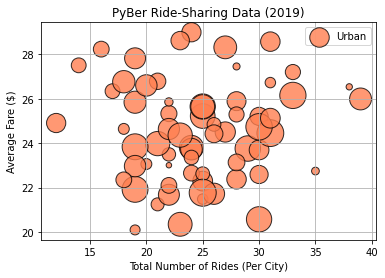

In [18]:
# Urban analysis bubble chart

plt.scatter(urban_ride_count,urban_avg_fare, s = urban_driver_count*10, c = "coral", edgecolor = "black", linewidths= 1, alpha = 0.8, label = "Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend();

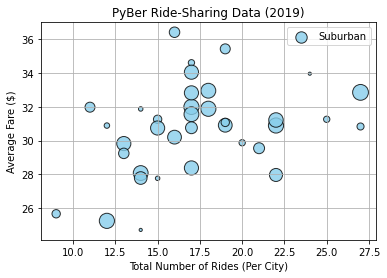

In [19]:
# Suburban analysis bubble chart

plt.scatter(suburban_ride_count,suburban_avg_fare, s = suburban_driver_count*10, c = "skyblue", edgecolor = "black", linewidths= 1, alpha = 0.8, label = "Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend();

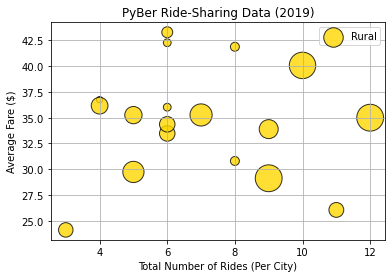

In [20]:
# Rural analysis bubble chart

plt.scatter(rural_ride_count,rural_avg_fare, s = rural_driver_count*10, c = "gold", edgecolor = "black", linewidths= 1, alpha = 0.8, label = "Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend();

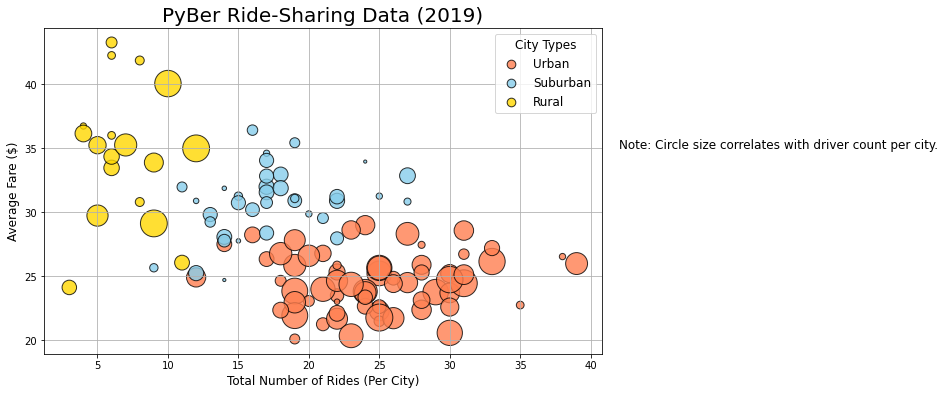

In [21]:
# Total analysis bubble graph
plt.subplots(figsize=(10, 6))

plt.scatter(urban_ride_count,urban_avg_fare, s = urban_driver_count*10, c = "coral", edgecolor = "black", linewidths= 1, alpha = 0.8, label = "Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend();

plt.scatter(suburban_ride_count,suburban_avg_fare, s = suburban_driver_count*10, c = "skyblue", edgecolor = "black", linewidths= 1, alpha = 0.8, label = "Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend();

plt.scatter(rural_ride_count,rural_avg_fare, s = rural_driver_count*10, c = "gold", edgecolor = "black", linewidths= 1, alpha = 0.8, label = "Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend();

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")


In [22]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [23]:
# Get urban fares
urban_fares = urban_cities_df["fare"]

import statistics as sts

# Calculate measures of central tendency for urban fares
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}")
median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}")
mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is ${mode_urban_fares}")

The mean fare price for urban trips is $24.53
The median fare price for urban trips is $24.64
The mode fare price for urban trips is $22.86


In [24]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

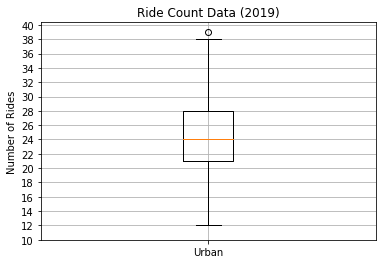

In [25]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

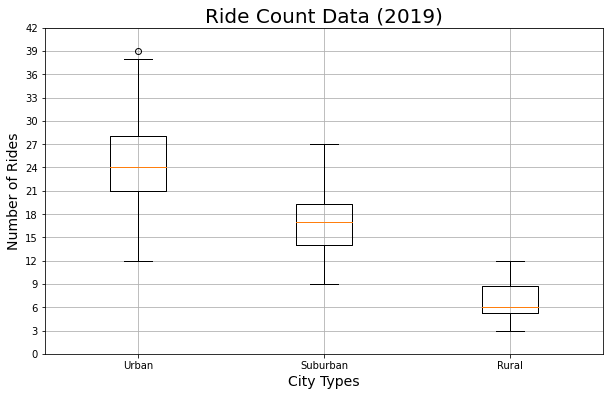

In [26]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [27]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


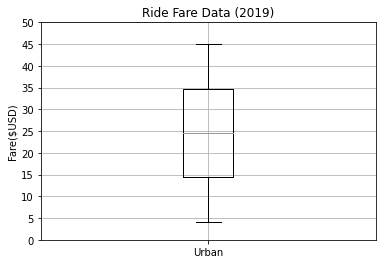

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [28]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

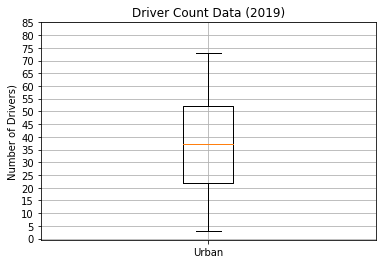

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [29]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

In [30]:
# Get total fares for each city type
total_fare = pyber_data_df["fare"].sum()
print(f"the total fare is ${total_fare:,}")
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

the total fare is $63,538.64


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [31]:
# Get percents
type_percents = 100 * sum_fares_by_type/total_fare
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

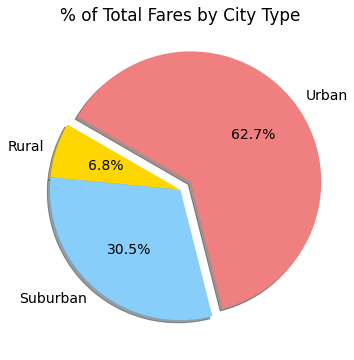

In [35]:
# Build pie chart
import matplotlib as mpl

plt.subplots(figsize = (10,6))

plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)

plt.title("% of Total Fares by City Type");

mpl.rcParams['font.size'] = 14

plt.savefig("analysis/Fig5.png")

In [38]:
# Get percentages of total rides by city type
total_rides = pyber_data_df.count()["ride_id"]
rides_per_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
pct_rides_per_type = 100 * rides_per_type/total_rides
pct_rides_per_type

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

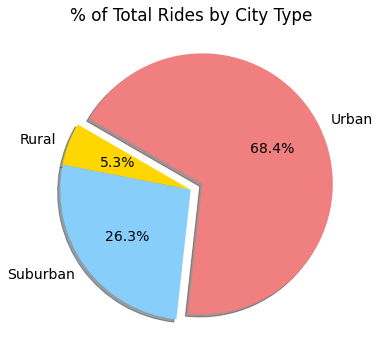

In [47]:
# Create pie chart
import matplotlib as mpl

plt.subplots(figsize=(10,6))

plt.pie(pct_rides_per_type, labels = ["Rural", "Suburban", "Urban"], 
       colors = ["gold", "lightskyblue", "lightcoral"], \
       explode = [0,0,0.1], \
       shadow = True, \
       autopct = "%1.1f%%", \
       startangle = 150)

plt.title("% of Total Rides by City Type")

mpl.rcParams['font.size'] = 14

plt.savefig("analysis/fig6.png")

In [54]:
# Calculate driver percentages
driver_percents = 100 * \
city_df.groupby(["type"]).sum()["driver_count"] / \
city_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

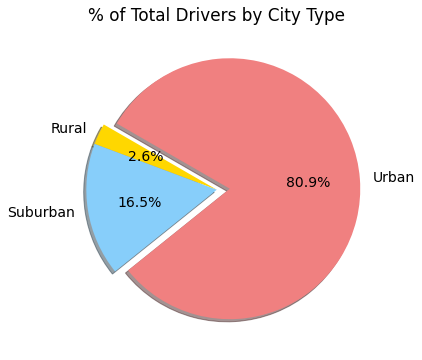

In [58]:
# Create pie chart
import matplotlib as mpl

plt.subplots(figsize=(10,6))

plt.pie(driver_percents, labels = ["Rural", "Suburban", "Urban"], \
       colors = ["gold", "lightskyblue", "lightcoral"], \
       explode = [0,0,0.1], \
       shadow = True, \
       autopct = "%1.1f%%", \
       startangle = 150)

plt.title("% of Total Drivers by City Type")

mpl.rcParams['font.size'] = 14

plt.savefig("analysis/Fig7.png")